In [11]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ------------- -------------------------- 102.4/300.2 kB 2.0 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/300.2 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\wordcloud_cli.exe' -> 'C:\\Python311\\Scripts\\wordcloud_cli.exe.deleteme'


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fake=pd.read_csv("dataset/Fake.csv")
true=pd.read_csv("dataset/True.csv")
fake['target']='fake'
true['target']='true'

In [4]:
df=pd.concat([fake,true]).reset_index(drop=True)

In [5]:
df

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


In [6]:
from sklearn.utils import shuffle
df=shuffle(df)
df=df.reset_index(drop=True)

In [7]:
df

,title,text,subject,date,target
0,Colbert’s Fear And White Privilege Confession...,The Late Show with Stephen Colbert had a very ...,News,"January 19, 2016",fake
1,Trump Makes ANOTHER Racist Joke About Mexican...,Donald Trump has been making racist comments a...,News,"June 30, 2016",fake
2,New Texas GOP Chair’s Twitter Feed Is Most IN...,There are a lot of crazy Republicans out there...,News,"March 2, 2016",fake
3,"Russia revels in Trump victory, looks to sanct...",MOSCOW (Reuters) - For all their mutual praise...,politicsNews,"November 9, 2016",true
4,She Might Be The Last Decent Republican In Am...,"Tuesday morning, attendees of a Senate subcomm...",News,"July 25, 2017",fake
...,...,...,...,...,...
44893,BERNIE SANDERS Makes A Promise To All American...,This guy is crazy! The last thing Americans ne...,politics,"Oct 18, 2015",fake
44894,U.S. House committee calls new hearing on Kasp...,WASHINGTON (Reuters) - A U.S. House of Represe...,politicsNews,"October 6, 2017",true
44895,Central African president pleads to U.N.: Don'...,UNITED NATIONS (Reuters) - The president of th...,worldnews,"September 20, 2017",true
44896,Trump’s Approval Rating Makes SHOCKING Change...,Donald Trump likes to whine about any poll tha...,News,"March 29, 2017",fake


In [8]:
df.drop(["date"],axis=1,inplace=True)
df.drop(["title"],axis=1,inplace=True)

In [9]:
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['text'] = df['text'].apply(lambda x : re.sub('[^a-zA-Z]', ' ', x))
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Praahas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Praahas\AppData\Roaming\nltk_data...


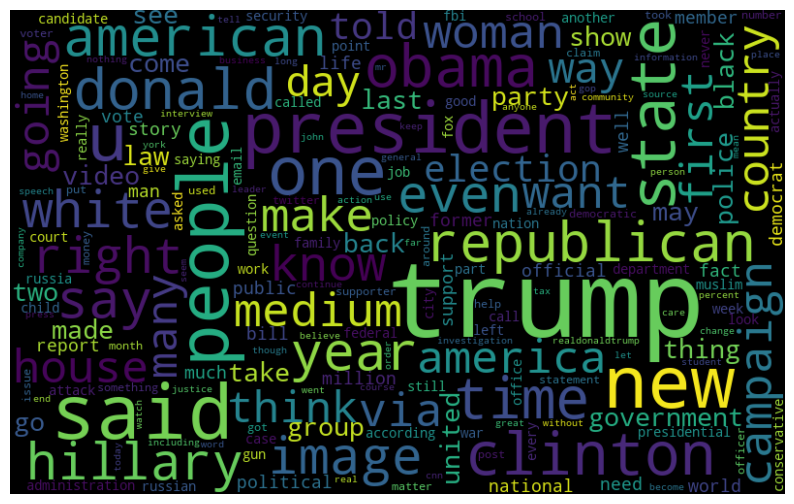

In [12]:
from wordcloud import WordCloud
fake_data = df[df["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


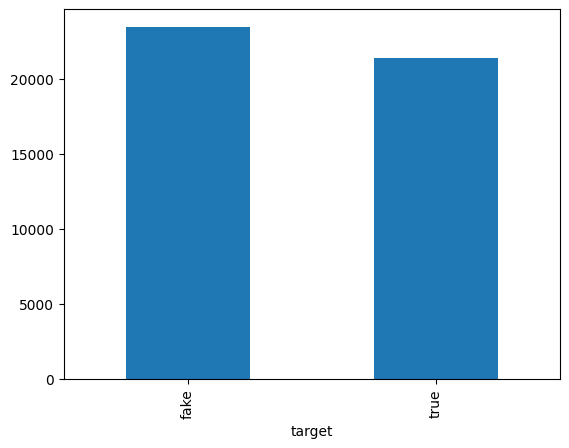

In [14]:
print(df.groupby(['target'])['text'].count())
df.groupby(['target'])['text'].count().plot(kind='bar')
plt.show()

In [15]:
df['text']

0        late show stephen colbert special guest celebr...
1        donald trump making racist comment hispanic po...
2        lot crazy republican trump supporter alex jone...
3        moscow reuters mutual praise russian president...
4        tuesday morning attendee senate subcommittee h...
                               ...                        
44893        guy crazy last thing american need higher tax
44894    washington reuters u house representative comm...
44895    united nation reuters president central africa...
44896    donald trump like whine poll show favorable li...
44897    yeah okay kanye noted jacka kanye west want wh...
Name: text, Length: 44898, dtype: object

[[4420  344]
 [ 160 4056]]


              precision    recall  f1-score   support

        fake       0.97      0.93      0.95      4764
        true       0.92      0.96      0.94      4216

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



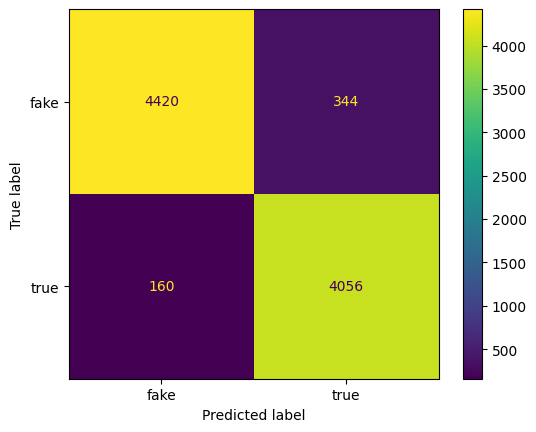

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['text'], df.target, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
steps=[('vect',TfidfVectorizer()),('model',MultinomialNB())]
pipe=Pipeline(steps)
model=pipe.fit(X_train,y_train)
predictions=model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)